In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.spatial import distance
from sklearn.cluster import DBSCAN

In [4]:


#load cancer dataset using sklearn dataset. Target is ['malignant', 'benign']
data=load_breast_cancer()

#Tranform sklearn dataset to pandas
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))




#save cancer Dataset
df.to_csv("breastCancer.csv", sep=',')

#read data from csv
df = pd.read_csv("breastCancer.csv", header = 0)

#print top 5 in the dataset
print(df.head(5))

#print last 5 in the dataset
print(df.tail(5))


#print dataframe columns
print(df.columns.values)


#drop some columns. 0 for rows and 1 for columns.
#inplace true means modify original data without mkaing a copy
#df.drop("id",axis=1,inplace=True)


#drop all columns except for some

df.drop(df.columns.difference(["mean radius","radius error","target"]),inplace=True, axis=1)

df.to_csv("breastCancer-filtered.csv", sep=',')

#retriev numeric columns only
#numericColumns = df._get_numeric_data()


#normalize values
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalizedColumns = pd.DataFrame(x_scaled)




#Select the target column
target=normalizedColumns[2]


normalizedColumns.drop(normalizedColumns.columns[2],inplace=True, axis=1)



#SVM Classfier wit cross validation
X_train, X_test, y_train, y_test = train_test_split(normalizedColumns, target, test_size=0.3, random_state=0)
clf = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=10)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))














   Unnamed: 0  mean radius  mean texture  mean perimeter  mean area  \
0           0        17.99         10.38          122.80     1001.0   
1           1        20.57         17.77          132.90     1326.0   
2           2        19.69         21.25          130.00     1203.0   
3           3        11.42         20.38           77.58      386.1   
4           4        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   mean symmetry  ...  worst texture  worst perimeter  worst area  \
0         0.2419  ...          17.33     

In [5]:
#Clustering

df = pd.read_csv("breastCancer.csv", header = 0)


#normalize values
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalizedColumns = pd.DataFrame(x_scaled)

D = distance.squareform(distance.pdist(normalizedColumns))

S = 1 - (D / np.max(D))

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(S)
core_samples = db.core_sample_indices_
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


print('Estimated number of clusters: %d' % n_clusters_)




Estimated number of clusters: 7


[48, 74, 79, 84, 93, 98, 115, 125, 137, 155, 187, 189, 195, 211, 224, 240, 251, 278, 293, 294, 304, 310, 324, 325, 346, 357, 362, 364, 367, 374, 384, 386, 394, 395, 399, 403, 405, 409, 411, 415, 420, 427, 434, 436, 437, 438, 454, 457, 458, 463, 464, 475, 480, 483, 490, 494, 497, 532]
[50, 52, 55, 67, 69]
[201]
[206]
[241, 285, 287, 306, 309, 315, 316, 327, 333, 350, 387, 404, 428, 429, 439, 442]
[488, 502, 515, 519, 530, 531, 534]
[513]


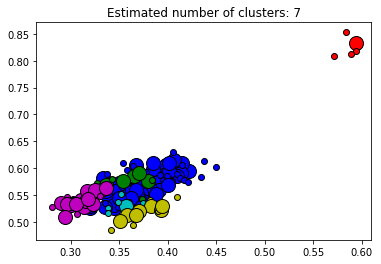

In [6]:
# #############################################################################
# Plot result
##############################################################################

import pylab as pl
from itertools import cycle

pl.close('all')
pl.figure(1)
pl.clf()

# Black removed and is used for noise instead.
colors = cycle('bgrcmybgrcmybgrcmybgrcmyfghfdghfghyutjujh')
for k, col in zip(set(labels), colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
        markersize = 6
    
    class_members = [index[0] for index in np.argwhere(labels == k)]
    cluster_core_samples = [index for index in core_samples
                                if labels[index] == k]

    if k != -1:


        print(cluster_core_samples)
        for index in class_members:
            x = S[index]
            if index in core_samples and k != -1:
                markersize = 14
            else:
                markersize = 6
            pl.plot(x[0], x[1], 'o', markerfacecolor=col,
                        markeredgecolor='k', markersize=markersize)

pl.title('Estimated number of clusters: %d' % n_clusters_)
pl.show()